In [1]:
import pandas as pd
import numpy as np
import ast
import json
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [3]:
with open('../data/usersitemsdata.json', encoding='utf-8') as f:
    lines = f.readlines()

In [4]:
lines[0]

'{\'user_id\': \'76561197970982479\', \'items_count\': 277, \'steam_id\': \'76561197970982479\', \'user_url\': \'http://steamcommunity.com/profiles/76561197970982479\', \'items\': [{\'item_id\': \'10\', \'item_name\': \'Counter-Strike\', \'playtime_forever\': 6, \'playtime_2weeks\': 0}, {\'item_id\': \'20\', \'item_name\': \'Team Fortress Classic\', \'playtime_forever\': 0, \'playtime_2weeks\': 0}, {\'item_id\': \'30\', \'item_name\': \'Day of Defeat\', \'playtime_forever\': 7, \'playtime_2weeks\': 0}, {\'item_id\': \'40\', \'item_name\': \'Deathmatch Classic\', \'playtime_forever\': 0, \'playtime_2weeks\': 0}, {\'item_id\': \'50\', \'item_name\': \'Half-Life: Opposing Force\', \'playtime_forever\': 0, \'playtime_2weeks\': 0}, {\'item_id\': \'60\', \'item_name\': \'Ricochet\', \'playtime_forever\': 0, \'playtime_2weeks\': 0}, {\'item_id\': \'70\', \'item_name\': \'Half-Life\', \'playtime_forever\': 0, \'playtime_2weeks\': 0}, {\'item_id\': \'130\', \'item_name\': \'Half-Life: Blue Shif

In [5]:
len(lines)

88310

In [6]:
j = ast.literal_eval(lines[0])

In [7]:
j

{'user_id': '76561197970982479',
 'items_count': 277,
 'steam_id': '76561197970982479',
 'user_url': 'http://steamcommunity.com/profiles/76561197970982479',
 'items': [{'item_id': '10',
   'item_name': 'Counter-Strike',
   'playtime_forever': 6,
   'playtime_2weeks': 0},
  {'item_id': '20',
   'item_name': 'Team Fortress Classic',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '30',
   'item_name': 'Day of Defeat',
   'playtime_forever': 7,
   'playtime_2weeks': 0},
  {'item_id': '40',
   'item_name': 'Deathmatch Classic',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '50',
   'item_name': 'Half-Life: Opposing Force',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '60',
   'item_name': 'Ricochet',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '70',
   'item_name': 'Half-Life',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '130',
   'item_name': 'Half-Life: Blue Shift',
   'playtime_forever

In [ ]:
import ast
import json

def process_chunk(chunk):
    newstring = '[' + ','.join(chunk) + ']'
    try:
        return ast.literal_eval(newstring)
    except MemoryError:
        print("Chunk too large to process")
        return []

chunk_size = 1000  # Adjust based on memory limits
output_file = 'data.json'

with open(output_file, 'w') as json_file:
    json_file.write('[')  # Start the JSON array

    first_chunk = True
    for i in range(0, len(lines), chunk_size):
        chunk = lines[i:i + chunk_size]
        processed_chunk = process_chunk(chunk)
        if processed_chunk:
            if not first_chunk:
                json_file.write(',')  # Add a comma before appending a new chunk
            json.dump(processed_chunk, json_file)
            first_chunk = False

    json_file.write(']')  # End the JSON array


In [9]:
j = ast.literal_eval(newstring)

MemoryError: 

In [10]:
with open('data.json', 'w') as json_file:
    json.dump(j, json_file)

In [11]:
df = pd.DataFrame(j)
df.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


In [12]:
with open('/content/steam_games.json') as f:
    lines = f.readlines()

In [13]:
lines[0]

"{u'publisher': u'Kotoshiro', u'genres': [u'Action', u'Casual', u'Indie', u'Simulation', u'Strategy'], u'app_name': u'Lost Summoner Kitty', u'title': u'Lost Summoner Kitty', u'url': u'http://store.steampowered.com/app/761140/Lost_Summoner_Kitty/', u'release_date': u'2018-01-04', u'tags': [u'Strategy', u'Action', u'Indie', u'Casual', u'Simulation'], u'discount_price': 4.49, u'reviews_url': u'http://steamcommunity.com/app/761140/reviews/?browsefilter=mostrecent&p=1', u'specs': [u'Single-player'], u'price': 4.99, u'early_access': False, u'id': u'761140', u'developer': u'Kotoshiro'}\n"

In [14]:
len(lines)

32135

In [15]:
j = ast.literal_eval(lines[0])

In [16]:
j

{'publisher': 'Kotoshiro',
 'genres': ['Action', 'Casual', 'Indie', 'Simulation', 'Strategy'],
 'app_name': 'Lost Summoner Kitty',
 'title': 'Lost Summoner Kitty',
 'url': 'http://store.steampowered.com/app/761140/Lost_Summoner_Kitty/',
 'release_date': '2018-01-04',
 'tags': ['Strategy', 'Action', 'Indie', 'Casual', 'Simulation'],
 'discount_price': 4.49,
 'reviews_url': 'http://steamcommunity.com/app/761140/reviews/?browsefilter=mostrecent&p=1',
 'specs': ['Single-player'],
 'price': 4.99,
 'early_access': False,
 'id': '761140',
 'developer': 'Kotoshiro'}

In [17]:
newstring = '[' + ','.join(lines) + ']'

In [18]:
j = ast.literal_eval(newstring)

In [19]:
with open('gamesdata.json', 'w') as json_file:
    json.dump(j, json_file)

In [20]:
df = pd.DataFrame(j)
df.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


In [21]:
df = pd.read_json('/content/gamesdata.json')
df.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570.0,NaN,NaN,NaN


In [22]:
df.to_csv('gamesdata.csv')

In [23]:
useritems = pd.read_json('/content/data.json')
useritems.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864384,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712560,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445856,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099488,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


In [24]:
numgames = useritems[['user_id', 'items_count']]
numgames.head()

,user_id,items_count
0,76561197970982479,277
1,js41637,888
2,evcentric,137
3,Riot-Punch,328
4,doctr,541


In [25]:
numgames.to_csv('numgames.csv')

In [26]:
useritems['items'][0][0:2]

[{'item_id': '10',
  'item_name': 'Counter-Strike',
  'playtime_forever': 6,
  'playtime_2weeks': 0},
 {'item_id': '20',
  'item_name': 'Team Fortress Classic',
  'playtime_forever': 0,
  'playtime_2weeks': 0}]

In [27]:
gameids = [useritems['items'][0][index]['item_id'] for index, _ in enumerate(useritems['items'][0])]
# Show first 10 item ids
gameids[:10]

['10', '20', '30', '40', '50', '60', '70', '130', '300', '240']

In [28]:
useritems['item_id'] = useritems['items'].apply(lambda x: [x [index]['item_id'] for index, _ in enumerate(x)])
useritems.head()

,user_id,items_count,steam_id,user_url,items,item_id
0,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...","[10, 20, 30, 40, 50, 60, 70, 130, 300, 240, 38..."
1,js41637,888,76561198035864384,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik...","[10, 80, 100, 300, 30, 40, 60, 240, 280, 360, ..."
2,evcentric,137,76561198007712560,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest...","[1200, 1230, 1280, 1520, 220, 320, 340, 360, 3..."
3,Riot-Punch,328,76561197963445856,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik...","[10, 20, 30, 40, 50, 60, 70, 130, 80, 100, 300..."
4,doctr,541,76561198002099488,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea...","[300, 20, 50, 70, 130, 10, 30, 40, 60, 80, 100..."


In [29]:
# Add a column with substitute user_id, counter
useritems['uid'] = np.arange(len(useritems))

# Take relevant columns
useritems = useritems[['uid', 'item_id']]

# Check
useritems.head()

,uid,item_id
0,0,"[10, 20, 30, 40, 50, 60, 70, 130, 300, 240, 38..."
1,1,"[10, 80, 100, 300, 30, 40, 60, 240, 280, 360, ..."
2,2,"[1200, 1230, 1280, 1520, 220, 320, 340, 360, 3..."
3,3,"[10, 20, 30, 40, 50, 60, 70, 130, 80, 100, 300..."
4,4,"[300, 20, 50, 70, 130, 10, 30, 40, 60, 80, 100..."


In [30]:
lst_col = 'item_id'
useritems = pd.DataFrame({col:np.repeat(useritems[col].values, useritems[lst_col].str.len())
                              for col in useritems.columns.difference([lst_col])
                        }).assign(**{lst_col:np.concatenate(useritems[lst_col].values)})[useritems.columns.tolist()]
useritems

,uid,item_id
0,0,10
1,0,20
2,0,30
3,0,40
4,0,50
...,...,...
5153204,88308,346330
5153205,88308,373330
5153206,88308,388490
5153207,88308,521570


In [31]:
# Add binary owned column
useritems['owned'] = np.ones(shape = useritems.shape[0])

# Check
useritems.head()

,uid,item_id,owned
0,0,10,1.0
1,0,20,1.0
2,0,30,1.0
3,0,40,1.0
4,0,50,1.0


In [32]:
len(useritems)

5153209

In [33]:
# Change item_id to int
useritems['item_id'] = useritems['item_id'].astype(int)

# Rename column to match
useritems = useritems.rename(columns={'item_id': 'id'})

In [34]:
# Merge useritems and games data dataframes
alldata = pd.merge(useritems, df, on = 'id')
alldata.head()

,uid,id,owned,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,developer,sentiment,metascore
0,0,10,1.0,Valve,[Action],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"[Action, FPS, Multiplayer, Shooter, Classic, T...",NaN,http://steamcommunity.com/app/10/reviews/?brow...,"[Multi-player, Valve Anti-Cheat enabled]",9.99,False,Valve,Overwhelmingly Positive,88
1,0,20,1.0,Valve,[Action],Team Fortress Classic,Team Fortress Classic,http://store.steampowered.com/app/20/Team_Fort...,1999-04-01,"[Action, FPS, Multiplayer, Classic, Shooter, C...",NaN,http://steamcommunity.com/app/20/reviews/?brow...,"[Multi-player, Valve Anti-Cheat enabled]",4.99,False,Valve,Very Positive,NaN
2,0,30,1.0,Valve,[Action],Day of Defeat,Day of Defeat,http://store.steampowered.com/app/30/Day_of_De...,2003-05-01,"[FPS, World War II, Multiplayer, Action, Shoot...",NaN,http://steamcommunity.com/app/30/reviews/?brow...,"[Multi-player, Valve Anti-Cheat enabled]",4.99,False,Valve,Very Positive,79
3,0,40,1.0,Valve,[Action],Deathmatch Classic,Deathmatch Classic,http://store.steampowered.com/app/40/Deathmatc...,2001-06-01,"[Action, FPS, Multiplayer, Classic, Shooter, F...",NaN,http://steamcommunity.com/app/40/reviews/?brow...,"[Multi-player, Valve Anti-Cheat enabled]",4.99,False,Valve,Very Positive,NaN
4,0,50,1.0,Valve,[Action],Half-Life: Opposing Force,Half-Life: Opposing Force,http://store.steampowered.com/app/50/HalfLife_...,1999-11-01,"[FPS, Action, Sci-fi, Singleplayer, Classic, S...",NaN,http://steamcommunity.com/app/50/reviews/?brow...,"[Single-player, Multi-player, Valve Anti-Cheat...",4.99,False,Gearbox Software,Very Positive,NaN


In [35]:
len(alldata)

4294257

In [36]:
# Drop entries with no title
datawithnames = alldata.dropna(axis=0, subset=['title'])
datawithnames.head()

,uid,id,owned,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,developer,sentiment,metascore
0,0,10,1.0,Valve,[Action],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"[Action, FPS, Multiplayer, Shooter, Classic, T...",NaN,http://steamcommunity.com/app/10/reviews/?brow...,"[Multi-player, Valve Anti-Cheat enabled]",9.99,False,Valve,Overwhelmingly Positive,88
1,0,20,1.0,Valve,[Action],Team Fortress Classic,Team Fortress Classic,http://store.steampowered.com/app/20/Team_Fort...,1999-04-01,"[Action, FPS, Multiplayer, Classic, Shooter, C...",NaN,http://steamcommunity.com/app/20/reviews/?brow...,"[Multi-player, Valve Anti-Cheat enabled]",4.99,False,Valve,Very Positive,NaN
2,0,30,1.0,Valve,[Action],Day of Defeat,Day of Defeat,http://store.steampowered.com/app/30/Day_of_De...,2003-05-01,"[FPS, World War II, Multiplayer, Action, Shoot...",NaN,http://steamcommunity.com/app/30/reviews/?brow...,"[Multi-player, Valve Anti-Cheat enabled]",4.99,False,Valve,Very Positive,79
3,0,40,1.0,Valve,[Action],Deathmatch Classic,Deathmatch Classic,http://store.steampowered.com/app/40/Deathmatc...,2001-06-01,"[Action, FPS, Multiplayer, Classic, Shooter, F...",NaN,http://steamcommunity.com/app/40/reviews/?brow...,"[Multi-player, Valve Anti-Cheat enabled]",4.99,False,Valve,Very Positive,NaN
4,0,50,1.0,Valve,[Action],Half-Life: Opposing Force,Half-Life: Opposing Force,http://store.steampowered.com/app/50/HalfLife_...,1999-11-01,"[FPS, Action, Sci-fi, Singleplayer, Classic, S...",NaN,http://steamcommunity.com/app/50/reviews/?brow...,"[Single-player, Multi-player, Valve Anti-Cheat...",4.99,False,Gearbox Software,Very Positive,NaN


In [37]:
len(datawithnames)

4222472

In [38]:
# Save to csv
datawithnames.to_csv('mergeddata.csv')

In [39]:
# Get relevant columns for recommendation engine
recdata = datawithnames[['uid','id','owned']]
recdata.head()

,uid,id,owned
0,0,10,1.0
1,0,20,1.0
2,0,30,1.0
3,0,40,1.0
4,0,50,1.0


In [40]:
# Save to csv
recdata.to_csv('recdata.csv')

In [41]:
gamesdata = pd.read_csv('gamesdata.csv', index_col = 0)
gamesdata.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",0.83,http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",1.79,http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,False,773570.0,NaN,NaN,NaN


In [42]:
# Load merged data
mergeddata = pd.read_csv('mergeddata.csv', index_col = 0)
mergeddata.head()

,uid,id,owned,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,developer,sentiment,metascore
0,0,10,1.0,Valve,['Action'],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",NaN,http://steamcommunity.com/app/10/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,False,Valve,Overwhelmingly Positive,88.0
1,0,20,1.0,Valve,['Action'],Team Fortress Classic,Team Fortress Classic,http://store.steampowered.com/app/20/Team_Fort...,1999-04-01,"['Action', 'FPS', 'Multiplayer', 'Classic', 'S...",NaN,http://steamcommunity.com/app/20/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",4.99,False,Valve,Very Positive,NaN
2,0,30,1.0,Valve,['Action'],Day of Defeat,Day of Defeat,http://store.steampowered.com/app/30/Day_of_De...,2003-05-01,"['FPS', 'World War II', 'Multiplayer', 'Action...",NaN,http://steamcommunity.com/app/30/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",4.99,False,Valve,Very Positive,79.0
3,0,40,1.0,Valve,['Action'],Deathmatch Classic,Deathmatch Classic,http://store.steampowered.com/app/40/Deathmatc...,2001-06-01,"['Action', 'FPS', 'Multiplayer', 'Classic', 'S...",NaN,http://steamcommunity.com/app/40/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",4.99,False,Valve,Very Positive,NaN
4,0,50,1.0,Valve,['Action'],Half-Life: Opposing Force,Half-Life: Opposing Force,http://store.steampowered.com/app/50/HalfLife_...,1999-11-01,"['FPS', 'Action', 'Sci-fi', 'Singleplayer', 'C...",NaN,http://steamcommunity.com/app/50/reviews/?brow...,"['Single-player', 'Multi-player', 'Valve Anti-...",4.99,False,Gearbox Software,Very Positive,NaN


In [43]:
# Load numgames data
numgames = pd.read_csv('numgames.csv', index_col = 0)
numgames.head()

,user_id,items_count
0,76561197970982479,277
1,js41637,888
2,evcentric,137
3,Riot-Punch,328
4,doctr,541


In [44]:
mergeddata['id'].nunique()

8791

In [45]:
mergeddata['uid'].nunique()

69277

In [46]:
# Select entries where release date is not null
data = gamesdata[gamesdata['release_date'].notnull()]

In [47]:
# Describe feature
data['release_date'].describe()

,release_date
count,30068
unique,3582
top,2012-10-16
freq,100


In [48]:
# Replace strings which are not of the format xxxx-xx-xx with None
data['release_date'] = data['release_date'].map(lambda x : x if x[-3] == '-'else None)

# Select entries where release date is not null
data = data[data['release_date'].notnull()]

# Convert to DateTime
data['release_date'] = pd.to_datetime(data['release_date'])

# Check
data['release_date'].describe()

,release_date
count,29783
mean,2015-04-21 10:02:55.267770112
min,1970-07-15 00:00:00
25%,2014-10-01 00:00:00
50%,2016-04-18 00:00:00
75%,2017-04-17 00:00:00
max,2021-12-31 00:00:00


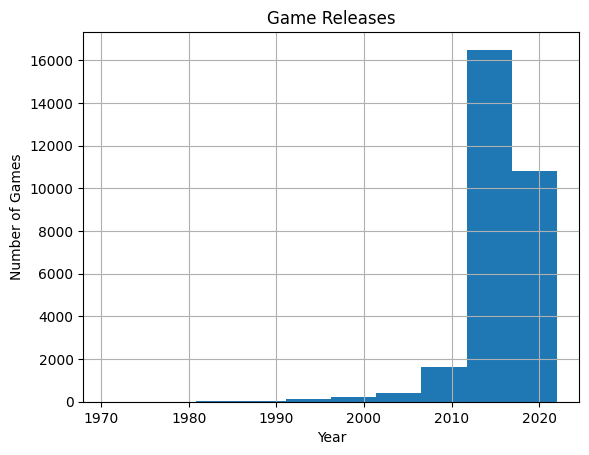

In [49]:
# Plot histogram of release date feat
data['release_date'].hist()
plt.title('Game Releases')
plt.ylabel('Number of Games')
plt.xlabel('Year')
plt.show()

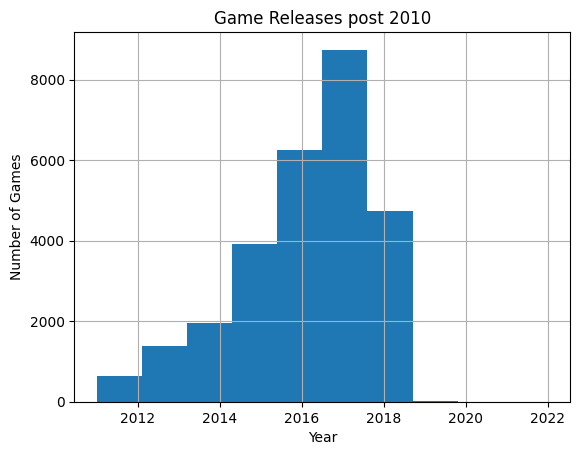

In [50]:
# Focus on post 2010
recentgames = data[data['release_date'].dt.year > 2010]

recentgames['release_date'].hist()
plt.title('Game Releases post 2010')
plt.ylabel('Number of Games')
plt.xlabel('Year')
plt.show()

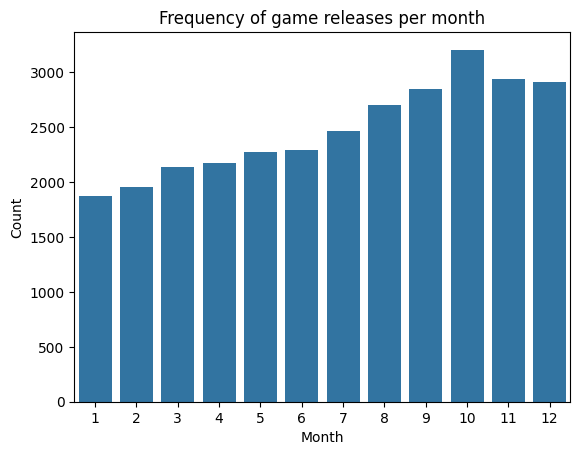

In [51]:
# Create month feature
data['release_month'] = data['release_date'].dt.month

# Plot countplot using Seaborn
sns.countplot(x = data['release_month'], data = data)
plt.title('Frequency of game releases per month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

ValueError: The palette dictionary is missing keys: {'6', '8', '9', '1', '5', '12', '2', '10', '11', '3', '7', '4'}

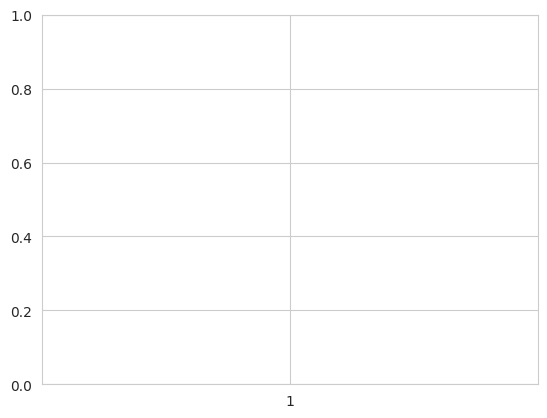

In [52]:
# Countplot of sale month

# define palette to highlight best months to buy house
custompalette = {release_month: "skyblue" if (release_month == 10 or release_month == 11 or release_month == 12 ) else "lightgrey" \
                 for release_month in data['release_month'].unique()}

with sns.axes_style("whitegrid"):
    sns.countplot(x = data['release_month'], palette = custompalette, data = data)
plt.title('Number of game releases per month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.savefig('Images/month.pdf', bbox_inches = "tight")

In [53]:
# Define function to determine quarter
def quarter(month):
    ''' Returns quarter in which month falls'''
    if 1 <= month <= 3:
        quarter = 'Q1'
    elif 4 <= month <= 6:
        quarter = 'Q2'
    elif 7 <= month <= 9:
        quarter = 'Q3'
    else:
        quarter = 'Q4'
    return quarter

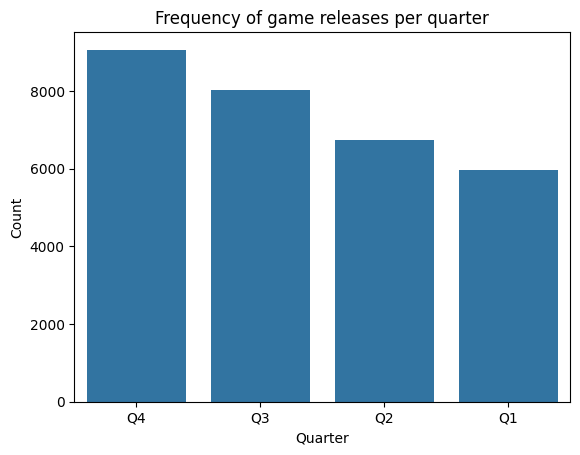

In [54]:
# Create quarter feature
data['release_quarter'] = data['release_month'].apply(quarter)

# Plot countplot using Seaborn
sns.countplot(x = data['release_quarter'], data = data,
              order = data['release_quarter'].value_counts().index)
plt.title('Frequency of game releases per quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.show()

In [55]:
# Create copy to work with
releasedatedata = mergeddata.copy()

# Select entries where release date is not null
releasedatedata = releasedatedata[releasedatedata['release_date'].notnull()]

# Replace strings which are not of the format xxxx-xx-xx with None
releasedatedata['release_date'] = releasedatedata['release_date'].map(lambda x : x if x[-3] == '-'else None)

# Select entries where release date is not null
releasedatedata = releasedatedata[releasedatedata['release_date'].notnull()]

# Convert to DateTime
releasedatedata['release_date'] = pd.to_datetime(releasedatedata['release_date'])

# Check
releasedatedata['release_date'].describe()

,release_date
count,4191586
mean,2011-10-14 03:28:16.298251264
min,1983-06-19 00:00:00
25%,2010-02-09 00:00:00
50%,2012-10-23 00:00:00
75%,2014-08-13 00:00:00
max,2018-12-01 00:00:00


In [56]:
# View head
numgames.head()

,user_id,items_count
0,76561197970982479,277
1,js41637,888
2,evcentric,137
3,Riot-Punch,328
4,doctr,541


In [57]:
# Get summary statistics
numgames['items_count'].describe()

,items_count
count,88310.000000
mean,58.353629
std,122.312095
min,0.000000
25%,3.000000
50%,26.000000
75%,73.000000
max,7762.000000


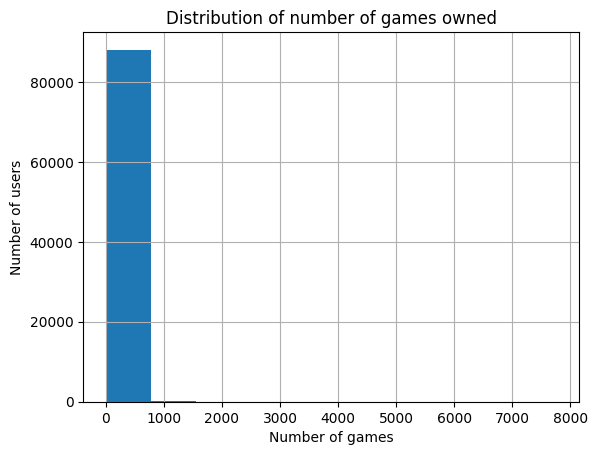

In [58]:
# Plot distribution of `items_count`
numgames['items_count'].hist()
plt.title('Distribution of number of games owned')
plt.xlabel('Number of games')
plt.ylabel('Number of users')
plt.show()

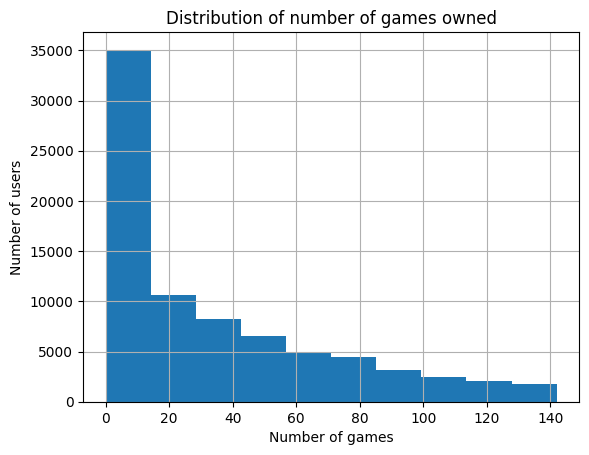

In [59]:
# Plot distribution of items_count within 90% centile
numgames[numgames['items_count'] < numgames['items_count'].quantile(0.90)].hist()
plt.title('Distribution of number of games owned')
plt.xlabel('Number of games')
plt.ylabel('Number of users')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Images/numgames.pdf'

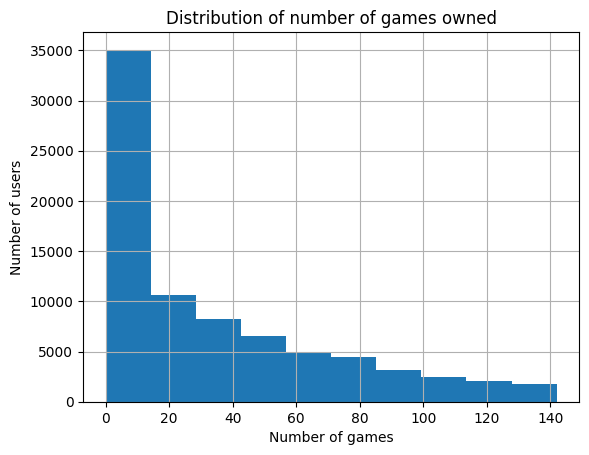

In [60]:
# Plot distribution of items_count within 90% centile
numgames[numgames['items_count'] < numgames['items_count'].quantile(0.90)].hist()
plt.title('Distribution of number of games owned')
plt.xlabel('Number of games')
plt.ylabel('Number of users')
plt.savefig('Images/numgames.pdf', bbox_inches = "tight")
plt.show()

In [61]:
# Create a copy to work with
gamesprice = gamesdata.copy()

# Get statistics and type
gamesprice['price'].describe()

,price
count,30758
unique,162
top,4.99
freq,4278


In [62]:
gamesprice = gamesprice.replace(to_replace = 'Free To Play', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Free', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Free Demo', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Play for Free!', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Install Now', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Play WARMACHINE: Tactics Demo', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Free Mod', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Install Theme', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Third-party', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Play Now', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Free HITMAN™ Holiday Pack', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Play the Demo', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Starting at $499.00', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Starting at $449.00', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Free to Try', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Free Movie', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Free to Use', value = 0)

In [63]:
# Convert to float
gamesprice['price'] = gamesprice['price'].astype(float)

ValueError: could not convert string to float: 'Free to Play'

In [64]:
# Get summary statistics
gamesprice['price'].describe()

,price
count,30758
unique,146
top,4.99
freq,4278


In [65]:
belowcentile = gamesprice[gamesprice['price'] < gamesprice['price'].quantile(0.99)]

TypeError: '<' not supported between instances of 'int' and 'str'

In [66]:
belowcentile['price'].describe()

NameError: name 'belowcentile' is not defined

In [67]:
belowcentile['price'].hist()
plt.xlabel('Price in USD')
plt.title('Game Price Distribution')
plt.savefig('Images/price.pdf', bbox_inches = "tight")
plt.show()

NameError: name 'belowcentile' is not defined

In [68]:
gamesdata.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",0.83,http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",1.79,http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,False,773570.0,NaN,NaN,NaN


In [69]:
# Create copy
gamegenres = gamesdata.copy()

# Drop NaN
gamegenres = gamegenres[gamegenres['genres'].notnull()]

# Get unique lists
genres = list(gamegenres['genres'].unique())

# View first 5
genres[:5]

["['Action', 'Casual', 'Indie', 'Simulation', 'Strategy']",
 "['Free to Play', 'Indie', 'RPG', 'Strategy']",
 "['Casual', 'Free to Play', 'Indie', 'Simulation', 'Sports']",
 "['Action', 'Adventure', 'Casual']",
 "['Action', 'Adventure', 'Simulation']"]

In [70]:
# Combine all strings
allgenres = ','.join(genres)

# Preview first 100 characters
allgenres[:100]

"['Action', 'Casual', 'Indie', 'Simulation', 'Strategy'],['Free to Play', 'Indie', 'RPG', 'Strategy']"

In [71]:
# Replace chars
allgenres = allgenres.replace("[","").replace("]", "").replace("'", "").replace(" ","")

# Check
allgenres[:100]

'Action,Casual,Indie,Simulation,Strategy,FreetoPlay,Indie,RPG,Strategy,Casual,FreetoPlay,Indie,Simula'

In [72]:
# Split
splitgenres = allgenres.split(',')
splitgenres[:5]

['Action', 'Casual', 'Indie', 'Simulation', 'Strategy']

In [73]:
# Use set to obtain unique values
uniquegenres = set(splitgenres)
uniquegenres

{'Accounting',
 'Action',
 'Adventure',
 'Animation&amp;Modeling',
 'AudioProduction',
 'Casual',
 'Design&amp;Illustration',
 'EarlyAccess',
 'Education',
 'FreetoPlay',
 'Indie',
 'MassivelyMultiplayer',
 'PhotoEditing',
 'RPG',
 'Racing',
 'Simulation',
 'SoftwareTraining',
 'Sports',
 'Strategy',
 'Utilities',
 'VideoProduction',
 'WebPublishing'}

In [74]:
# Create columns with genres
for genre in uniquegenres:
    gamegenres[genre] = 0

# Split genres in genres column
gamegenres['genres'] = gamegenres['genres'].map(lambda x : x.replace("["," ").replace("]", "").replace("'", "").replace(" ","").split(','))

# Map to columns - set to 1 if genre applies
for index, genres in enumerate(gamegenres['genres']):
    for genre in genres:
        gamegenres.loc[index,genre] = 1

# Visuale the new columns
gamegenres.head(2)

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,...,RPG,Utilities,Animation&amp;Modeling,Simulation,MassivelyMultiplayer,FreetoPlay,PhotoEditing,SoftwareTraining,Design&amp;Illustration,Racing
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Making Fun, Inc.","[FreetoPlay, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [75]:
gamegenres.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'discount_price', 'reviews_url', 'specs', 'price',
       'early_access', 'id', 'developer', 'sentiment', 'metascore', 'Casual',
       'AudioProduction', 'Accounting', 'Indie', 'Adventure', 'Sports',
       'Education', 'EarlyAccess', 'VideoProduction', 'Action', 'Strategy',
       'WebPublishing', 'RPG', 'Utilities', 'Animation&amp;Modeling',
       'Simulation', 'MassivelyMultiplayer', 'FreetoPlay', 'PhotoEditing',
       'SoftwareTraining', 'Design&amp;Illustration', 'Racing'],
      dtype='object')

In [76]:
# Start with empty dictionary
genredict = {}

# Get genre columns
genrecols = gamegenres.loc[:, 'Casual':'Adventure'].columns

# Go through each column and sum it
for col in genrecols:
    genredict[col] = gamegenres[col].sum()

# sort dictionary based on counts, ascending order so reverse = True
sortedgenresdict = {keys: values for keys, values in \
                        sorted(genredict.items(), key = lambda item: item[1], reverse = True)}

In [77]:
# View dictionary
sortedgenresdict

{'Indie': 15858.0,
 'Casual': 8282.0,
 'Adventure': 8243.0,
 'AudioProduction': 93.0,
 'Accounting': 7.0}

In [78]:
# Create copy
gametags = gamesdata.copy()

# Drop NaN
gametags = gamegenres[gamegenres['tags'].notnull()]

# Get unique lists
tags = list(gametags['tags'].unique())

# View first 5
tags[:5]

["['Strategy', 'Action', 'Indie', 'Casual', 'Simulation']",
 "['Free to Play', 'Strategy', 'Indie', 'RPG', 'Card Game', 'Trading Card Game', 'Turn-Based', 'Fantasy', 'Tactical', 'Dark Fantasy', 'Board Game', 'PvP', '2D', 'Competitive', 'Replay Value', 'Character Customization', 'Female Protagonist', 'Difficult', 'Design & Illustration']",
 "['Free to Play', 'Simulation', 'Sports', 'Casual', 'Indie', 'Multiplayer']",
 "['Action', 'Adventure', 'Casual']",
 "['Action', 'Adventure', 'Simulation', 'FPS', 'Shooter', 'Third-Person Shooter', 'Sniper', 'Third Person']"]

In [79]:
# Combine all strings
alltags = ','.join(tags)

# Preview first 100 characters
alltags[:100]

"['Strategy', 'Action', 'Indie', 'Casual', 'Simulation'],['Free to Play', 'Strategy', 'Indie', 'RPG',"

In [80]:
# Replace chars
alltags = alltags.replace("["," ").replace("]", "").replace("'", "")

# Check
alltags[:100]

' Strategy, Action, Indie, Casual, Simulation, Free to Play, Strategy, Indie, RPG, Card Game, Trading'

In [81]:
# Split
splittags = alltags[1:].split(',')
splittags[:5]

['Strategy', ' Action', ' Indie', ' Casual', ' Simulation']

In [82]:
# Use set to obtain unique values
uniquetags = set(splittags)
len(uniquetags)

337

In [83]:
# Select entries where publisher is non-null
data = gamesdata[gamesdata['publisher'].notnull()]

In [84]:
# Create dictionary
game_publishers = {}
for publisher in list(data['publisher']):
    if not publisher in game_publishers:
        game_publishers[publisher] = 1
    else:
        game_publishers[publisher] += 1

In [85]:
# Get top 10 publishers
top10_publishers = dict(Counter(game_publishers).most_common(10))
top10_publishers

{'Ubisoft': 385,
 'Dovetail Games - Trains': 360,
 'Degica': 286,
 'Paradox Interactive': 271,
 'SEGA': 251,
 'Dovetail Games - Flight': 220,
 'KOEI TECMO GAMES CO., LTD.': 208,
 'Activision': 202,
 'Big Fish Games': 195,
 'KISS ltd': 189}

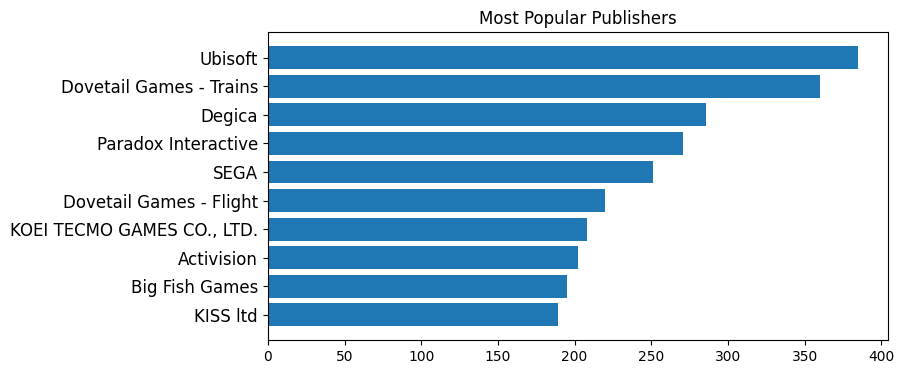

In [86]:
# Prepare for bar chart plot
top10_publishers = dict(sorted(Counter(game_publishers).most_common(10), key=lambda x:x[1]))

# Plots most popular publishers
fig = plt.figure(figsize = (8,4))
plt.barh(range(len(top10_publishers)), list(top10_publishers.values()), align='center')
plt.yticks(range(len(top10_publishers)), list(top10_publishers.keys()), fontsize=12)
plt.title("Most Popular Publishers", fontsize=12, fontweight= 22)
plt.show()